In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.info()        # 기본 정보 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.describe()          # 기술 통계

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic['survived'].value_counts()
# titanic['sex'].value_counts()
# titanic.survived.value_counts()     

0    549
1    342
Name: survived, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

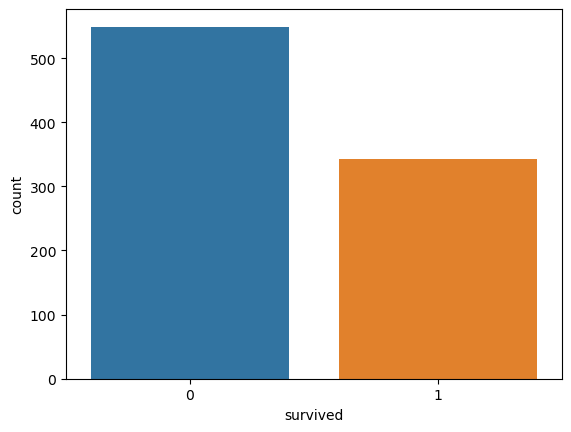

In [8]:
sns.countplot(x = 'survived', data = titanic)      # seaborn에서 제공하는 그래프 그리기
# x축에 survived를 뿌림

In [18]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [23]:
titanic.groupby(['survived', 'class'])['fare'].mean() #금액을 엄마나 지급
#titanic.groupby(['survived', 'class'])['fare'].mean()

survived  class 
0         First     64.684007
          Second    19.412328
          Third     13.669364
1         First     95.608029
          Second    22.055700
          Third     13.694887
Name: fare, dtype: float64

In [24]:
titanic.groupby(['pclass', 'sex'])['survived'].value_counts()  # 등급별 성별마다 생존률

pclass  sex     survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: survived, dtype: int64

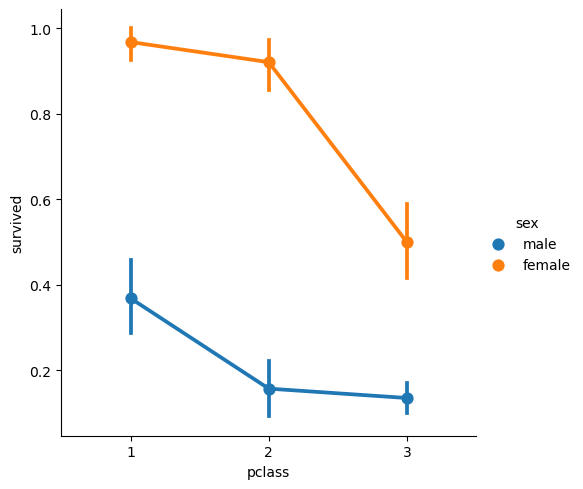

In [34]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point') 
# hue(범례)

TypeError: inner() got multiple values for argument 'ax'

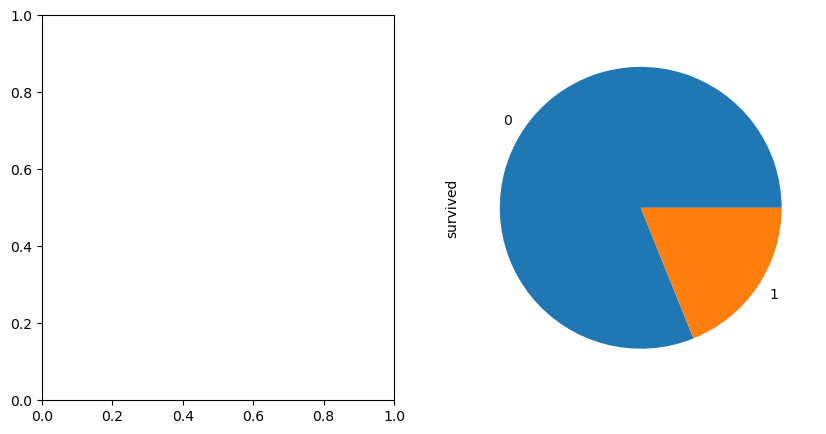

In [32]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize = (10, 5))       # p.37
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie().pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)


In [31]:
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

NameError: name 'ax' is not defined

In [46]:
titanic.isnull().sum()      # age 177개 만큼 null

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [43]:
#titanic = titanic.drop(['deck'], axis = 'columns')   # deck 사라짐
titanic = titanic.drop(['embarked'], axis = 'columns') # embarked 삭제

In [45]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median()) # median값으로 fillna: 공백의 값을 채움

In [47]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [51]:
titanic['embark_town'].mode()[0]      # Series형태이므로 0인덱스로 접근 

'Southampton'

In [55]:
#titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0]) #mode : 가장 많이 나온 값

In [56]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [58]:
titanic_corr = titanic.corr(method = 'pearson')     # pearson상관계수: 두 변수의 선형 상관계수, corr: numeric_only(boolean, float, int)만 상관계수 처리

C:\Users\suhyu\AppData\Local\Temp\ipykernel_24780\3305674039.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_corr = titanic.corr(method = 'pearson')


In [59]:
titanic_corr      # 대체로 증가 0<p<1, 대체로 감소 -1<p<0, 완벽히 증가 p=1, 완벽히 감소 p=-1

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic = titanic

<Axes: >

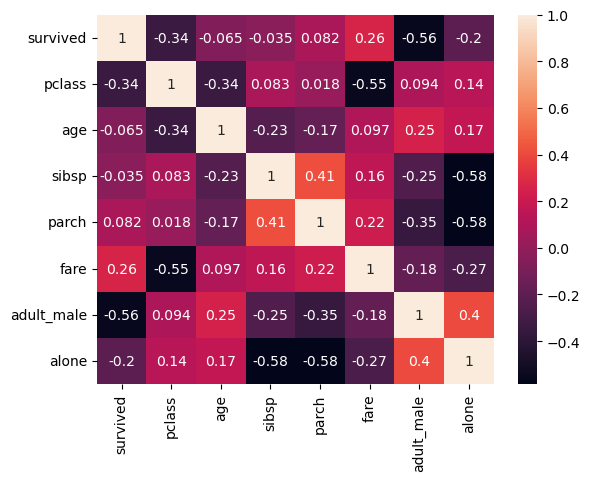

In [61]:
sns.heatmap(titanic_corr, annot = True)